<a href="https://colab.research.google.com/github/rasyidabdi/MachineLearningTask/blob/main/Week9/Rasyid%20Abdi_1103204127_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


Nama : Rasyid Abdi Gantoro
Nim : 1103204127

In [3]:
import pandas as pd

# Adjust the file path accordingly
file_path = '/content/drive/MyDrive/DATASET/housing.csv'

# Read the dataset into a DataFrame
file_path = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
file_path.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import accuracy_score

In [5]:
# Define features and target
X = file_path.drop(columns=['AboveMedianPrice'])
y = file_path['AboveMedianPrice']

# Normalize features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Split data into train and validation/test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_normalized, y, test_size=0.5, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=42)

# Define the neural network model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=0)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


KeyError: "['AboveMedianPrice'] not found in axis"

In [6]:
import matplotlib.pyplot as plt

# Predict on test data
y_pred = model.predict(X_test).flatten()

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual AboveMedianPrice')
plt.ylabel('Predicted AboveMedianPrice')
plt.title('Actual vs Predicted AboveMedianPrice')
plt.show()


NameError: name 'model' is not defined

NameError: name 'history' is not defined

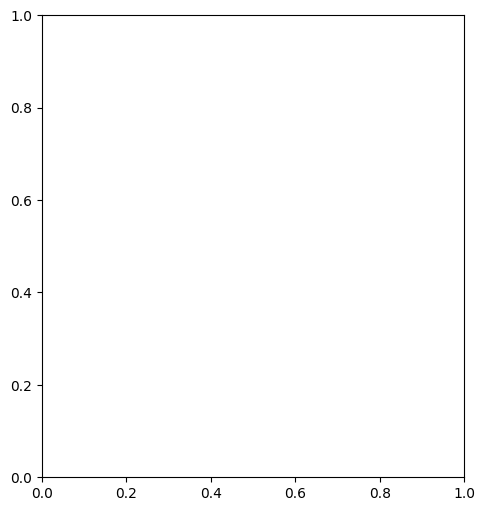

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# # Train the model
# history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=0)

# Visualize the training process
plt.figure(figsize=(12, 6))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.show()